Code written by Leiv Andresen, HTD-A, leiv.andresen@axpo.com

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math

# Validate output

In [3]:
all_vids = pd.read_csv("output/csv_transformed/alle_videos_transformiert.csv", delimiter=",")
all_vids.head()

,Unnamed: 0,Zeit,Framenummer,x - Koordinate,y - Koordinate,Klassifikation,ID,Wasserhoehe,Jahr,Dateiname
0,0,22-05-27_21-45-00.000,1,2923,1122,red,291,NaN,2022,ARIS_videos/2022_processed/2022-05-27_214500_w...
1,1,22-05-27_21-45-00.125,2,2902,1092,red,291,NaN,2022,ARIS_videos/2022_processed/2022-05-27_214500_w...
2,2,22-05-27_21-45-00.250,3,2876,1064,red,291,NaN,2022,ARIS_videos/2022_processed/2022-05-27_214500_w...
3,3,22-05-27_21-45-00.375,4,2850,1035,red,291,NaN,2022,ARIS_videos/2022_processed/2022-05-27_214500_w...
4,4,22-05-27_21-45-00.500,5,2830,1005,red,291,NaN,2022,ARIS_videos/2022_processed/2022-05-27_214500_w...


**Dots - verify they are inside the rake --> x,y = 0,0 to 4400, ~2300**

<AxesSubplot: xlabel='x - Koordinate', ylabel='y - Koordinate'>

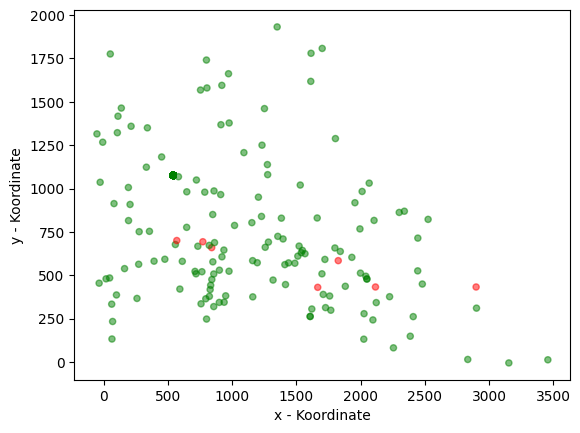

In [4]:
df = all_vids
col = df.loc[df.Klassifikation.str.contains("dot"), 
       "Klassifikation"].map({"red dot":'r', "green dot":'g'})
df.loc[df.Klassifikation.str.contains("dot"), 
       ["x - Koordinate", "y - Koordinate"]].plot.scatter(x="x - Koordinate", y="y - Koordinate", c=col, alpha=0.5)

**Paths**

<AxesSubplot: xlabel='x - Koordinate', ylabel='y - Koordinate'>

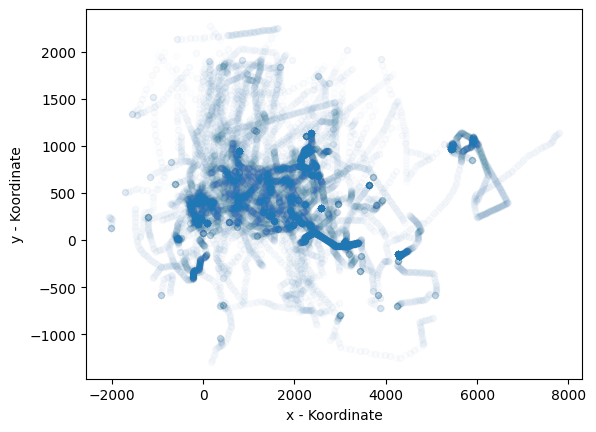

In [54]:
df.loc[~df.Klassifikation.str.contains("dot"), ["x - Koordinate", "y - Koordinate"]].plot.scatter(x="x - Koordinate", y="y - Koordinate", alpha=0.01)

In [6]:
# df.loc[(df["x - Koordinate"] < -1800), "Dateiname"].to_list()

In [29]:
len(all_vids.Dateiname.unique())

111

**Export missing files**

In [41]:
old = pd.read_csv("output/csv_transformiert/alle_videos_2022_transformiert.csv", delimiter=",")
old = list(old.Dateiname.unique())

In [43]:
new = list(df.Dateiname.unique())
diff = list(set(new) - set(old))

In [44]:
diff.sort()

In [45]:
diff

['ARIS_videos/2021_processed/26.2_2021-11-13_191500_1_1044 R_FischROT.mp4',
 'ARIS_videos/2021_processed/26.2_2021-11-13_191500_1_1044 R_Punkte.mp4',
 'ARIS_videos/2021_processed/27_2021-11-14_053000_4280_4811_Rechenpass_Fragezeichen_FischROT.mp4',
 'ARIS_videos/2021_processed/27_2021-11-14_053000_4280_4811_Rechenpass_Fragezeichen_Punkte1.mp4',
 'ARIS_videos/2021_processed/27_2021-11-14_053000_4280_4811_Rechenpass_Fragezeichen_Punkte2.mp4',
 'ARIS_videos/2021_processed/34_2021-11-15_200000_1985_3975 R_FischROT.mp4',
 'ARIS_videos/2021_processed/34_2021-11-15_200000_1985_3975 R_Punkte.mp4',
 'ARIS_videos/2021_processed/38.3_2021-11-17_043000_4405_4988 R_FischROT.mp4',
 'ARIS_videos/2021_processed/38.4_2021-11-17_044500_1_1145 R_FischROT.mp4',
 'ARIS_videos/2021_processed/48_2021-11-23_171500_4775_4983 R_FischROT.mp4',
 'ARIS_videos/2021_processed/48_2021-11-23_171500_4775_4983 R_Punkte.mp4',
 'ARIS_videos/2021_processed/58_2021-11-11_060000_2197_2708 R_FischROT.mp4',
 'ARIS_videos/2021_

In [46]:
# Export only new ones:
new_files = ['ARIS_videos/2022_processed/Video 6_2022-05-27_061500_window#001 Rechenkont_FischROT.mp4',
 'ARIS_videos/2022_processed/Video 6_2022-05-27_061500_window#001 Rechenkont_Punkte.mp4',
 'ARIS_videos/2022_processed/Video 7_2022-05-27_073000_window#001 zu bespr abtast+Rechenpass_FischROT.mp4',
 'ARIS_videos/2022_processed/Video 7_2022-05-27_073000_window#001 zu bespr abtast+Rechenpass_Punkte.mp4',
            "ARIS_videos/2021_processed/38.3_2021-11-17_043000_4405_4988 R_FischROT.mp4"]

In [50]:
new_files

['ARIS_videos/2022_processed/Video 6_2022-05-27_061500_window#001 Rechenkont_FischROT.mp4',
 'ARIS_videos/2022_processed/Video 6_2022-05-27_061500_window#001 Rechenkont_Punkte.mp4',
 'ARIS_videos/2022_processed/Video 7_2022-05-27_073000_window#001 zu bespr abtast+Rechenpass_FischROT.mp4',
 'ARIS_videos/2022_processed/Video 7_2022-05-27_073000_window#001 zu bespr abtast+Rechenpass_Punkte.mp4',
 'ARIS_videos/2021_processed/38.3_2021-11-17_043000_4405_4988 R_FischROT.mp4']

In [49]:
df[df.Dateiname.isin(new_files)].drop(columns=["Unnamed: 0"]).to_csv("output/daten_zusaetzliche_videos.csv", index=False)

**old 2021**

In [24]:
all_vids_2021 = pd.read_csv("output/csv_transformiert/alle_videos_transformiert.csv", delimiter=",")
all_vids_2021.head()

,Unnamed: 0,Zeit,Framenummer,x - Koordinate,y - Koordinate,Klassifikation,ID,Wasserhoehe,Jahr,Dateiname
0,0,21-11-13_19-15-00.125,1,4511,268,red,1,2144,2021,ARIS_videos/2021_processed/26.2_2021-11-13_191...
1,1,21-11-13_19-15-00.250,2,4515,263,red,1,2144,2021,ARIS_videos/2021_processed/26.2_2021-11-13_191...
2,2,21-11-13_19-15-00.375,3,4525,262,red,1,2144,2021,ARIS_videos/2021_processed/26.2_2021-11-13_191...
3,3,21-11-13_19-15-00.500,4,4529,257,red,1,2144,2021,ARIS_videos/2021_processed/26.2_2021-11-13_191...
4,4,21-11-13_19-15-00.625,5,4529,257,red,1,2144,2021,ARIS_videos/2021_processed/26.2_2021-11-13_191...


<AxesSubplot: xlabel='x - Koordinate', ylabel='y - Koordinate'>

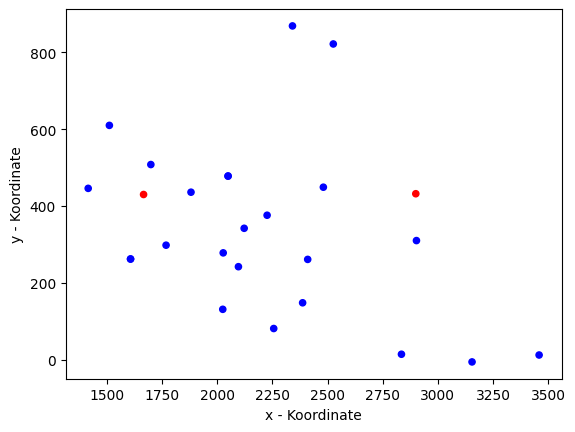

In [36]:
df = all_vids_2021
col = df.loc[df.Klassifikation.str.contains("dot"), 
       "Klassifikation"].map({"red dot":'r', "green dot":'b'})
df.loc[df.Klassifikation.str.contains("dot"), 
       ["x - Koordinate", "y - Koordinate"]].plot.scatter(x="x - Koordinate", y="y - Koordinate", c=col)

<AxesSubplot: xlabel='x - Koordinate', ylabel='y - Koordinate'>

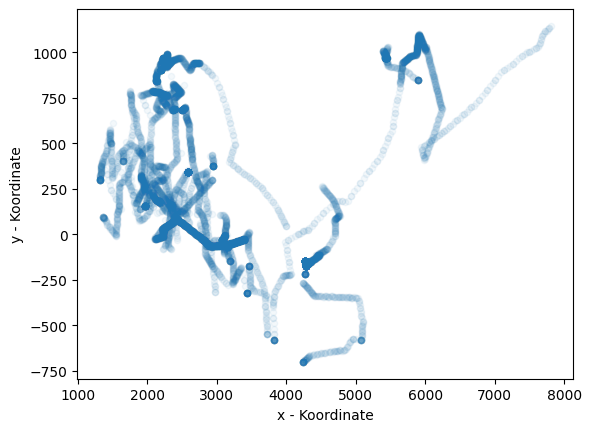

In [43]:
df = all_vids_2021
df.loc[:, ["x - Koordinate", "y - Koordinate"]].plot.scatter(x="x - Koordinate", y="y - Koordinate", alpha=0.05)

**2022 and total**

In [78]:
all_vids_2022 = pd.read_csv("output/csv_transformiert/alle_videos_2022_transformiert.csv", delimiter=",")
all_vids_2022.head()

,Unnamed: 0,Zeit,Framenummer,x - Koordinate,y - Koordinate,Klassifikation,ID,Wasserhoehe,Jahr,Dateiname
0,0,22-05-27_21-45-00.000,1,2923,1122,red,42,NaN,2022,ARIS_videos/2022_processed/2022-05-27_214500_w...
1,1,22-05-27_21-45-00.125,2,2902,1092,red,42,NaN,2022,ARIS_videos/2022_processed/2022-05-27_214500_w...
2,2,22-05-27_21-45-00.250,3,2876,1064,red,42,NaN,2022,ARIS_videos/2022_processed/2022-05-27_214500_w...
3,3,22-05-27_21-45-00.375,4,2850,1035,red,42,NaN,2022,ARIS_videos/2022_processed/2022-05-27_214500_w...
4,4,22-05-27_21-45-00.500,5,2830,1005,red,42,NaN,2022,ARIS_videos/2022_processed/2022-05-27_214500_w...


In [79]:
all_vids_2022.ID.max()

301

<AxesSubplot: xlabel='x - Koordinate', ylabel='y - Koordinate'>

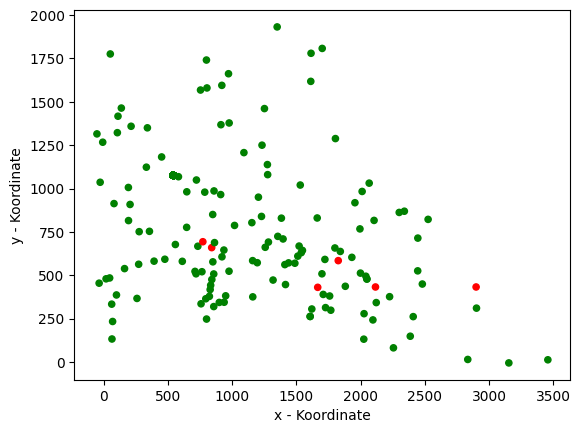

In [92]:
df = pd.concat([all_vids_2021, all_vids_2022])
col = df.loc[df.Klassifikation.str.contains("dot"), 
       "Klassifikation"].map({"red dot":'r', "green dot":'g'})
df.loc[df.Klassifikation.str.contains("dot"), 
       ["x - Koordinate", "y - Koordinate"]].plot.scatter(x="x - Koordinate", y="y - Koordinate", c=col)

<AxesSubplot: xlabel='x - Koordinate', ylabel='y - Koordinate'>

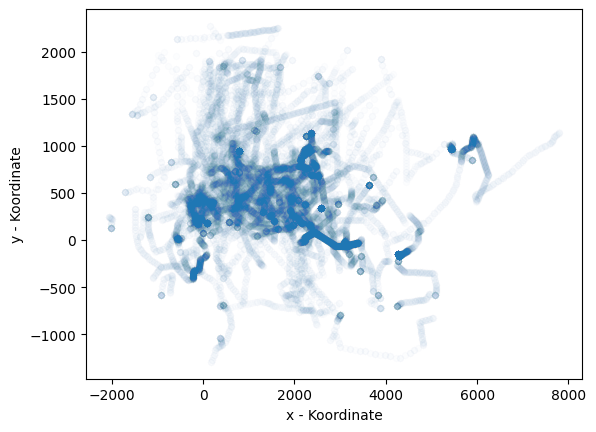

In [97]:
df = pd.concat([all_vids_2021, all_vids_2022])
col = df.loc[~df.Klassifikation.str.contains("dot"), 
       "Jahr"].map({"2021":'g', "2022":'b'})
df.loc[~df.Klassifikation.str.contains("dot"), ["x - Koordinate", "y - Koordinate"]].plot.scatter(x="x - Koordinate", y="y - Koordinate", alpha=0.01)

In [84]:
df.loc[(df["x - Koordinate"] < -1800), "Dateiname"].to_list()

['ARIS_videos/2022_reexport/Video 1_2022-05-04_081500_953_2435 zu besprechen, Rechenpass_PunkteROT.mp4',
 'ARIS_videos/2022_reexport/Video 1_2022-05-04_081500_953_2435 zu besprechen, Rechenpass_PunkteROT.mp4',
 'ARIS_videos/2022_reexport/Video 1_2022-05-04_081500_953_2435 zu besprechen, Rechenpass_PunkteROT.mp4',
 'ARIS_videos/2022_reexport/Video 1_2022-05-04_081500_953_2435 zu besprechen, Rechenpass_PunkteROT.mp4',
 'ARIS_videos/2022_reexport/Video 1_2022-05-04_081500_953_2435 zu besprechen, Rechenpass_PunkteROT.mp4',
 'ARIS_videos/2022_reexport/Video 1_2022-05-04_081500_953_2435 zu besprechen, Rechenpass_PunkteROT.mp4',
 'ARIS_videos/2022_reexport/Video 1_2022-05-04_081500_953_2435 zu besprechen, Rechenpass_PunkteROT.mp4',
 'ARIS_videos/2022_reexport/Video 1_2022-05-04_081500_953_2435 zu besprechen, Rechenpass_PunkteROT.mp4',
 'ARIS_videos/2022_reexport/Video 1_2022-05-04_081500_953_2435 zu besprechen, Rechenpass_PunkteROT.mp4',
 'ARIS_videos/2022_reexport/Video 1_2022-05-04_081500_9

# Testing

In [13]:
keypoints_csv_2021 = "output/keypoints_2021_additional.csv"
keypoints_2021 = pd.read_csv(keypoints_csv_2021, delimiter=",")
keypoints_2021.head()

,filename,point 1x,point 1y,point 2x,point 2y,water level x,water level y
0,ARIS_videos/2021/38.3_2021-11-17_043000_4405_4...,1144,867,1428,847,1072,425


In [15]:
def calculate_rot_and_scale(dataframe_keypoints):
    transformations = {}
    for _, row in dataframe_keypoints.iterrows():
        delta_x, delta_y = row["point 2x"] - row["point 1x"], row["point 2y"] - row["point 1y"]
        
        angle = -math.atan(delta_y / delta_x)
        
        R = np.array([
            [np.cos(angle), -np.sin(angle), 0],
            [np.sin(angle),  np.cos(angle), 0],
            [0, 0, 1]
                ])
        
        s = 1400 / np.hypot(delta_x, delta_y)
        S = np.array([
            [s, 0, 0],
            [0, s, 0],
            [0, 0, 1]
                ])
        
        
        tx, ty = -row["point 1x"], - row["point 1y"]
            
        T = np.array([
            [1, 0, tx],
            [0, 1, ty],
            [0, 0, 1]
        ])
        
        if "2021" in row["filename"]:
            t2x, t2y = 5000, 850
        else:
            t2x, t2y = 0, 0
            
        T2 = np.array([
            [1, 0, t2x],
            [0, 1, t2y],
            [0, 0, 1]
        ])
            
        
        transformations[row["filename"]] = {"R": R, "S": S, "T": T, "T2": T2}
        
    return transformations
        
trafos = calculate_rot_and_scale(keypoints_2021)

In [16]:
keypoints_2021["wasserhoehe"] = None

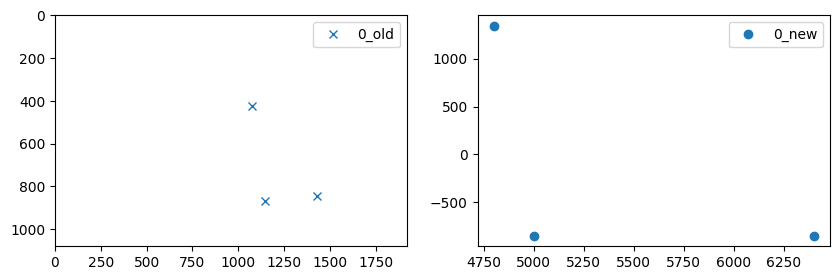

In [17]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,  figsize=(10, 3))
ax1.set_xlim([0, 1920])
ax1.set_ylim([0, 1080])
ax1.invert_yaxis()

# ax2.set_xlim([-100, 1000])
# ax2.set_ylim([-100, 400])

for index, row in keypoints_2021.iterrows():
    points = np.array([
            [row["point 1x"], row["point 2x"], row["water level x"]],
            [row["point 1y"], row["point 2y"], row["water level y"]],
            [1, 1, 1]
        ])
        
    ts = trafos[row["filename"]]
    points_new = ts["R"] @ ts["S"] @ ts["T"] @ points
    #points_new = ts["S"] @ points

    points_new = np.array([
            [1, 0, 0],
            [0, -1, 0],
            [0, 0, 1]
        ]) @ ts["T2"] @ points_new
    
    ax1.plot(points[0, :], points[1, :], 'x', label=str(index) + '_old')
    ax2.plot(points_new[0, :], points_new[1, :], 'o', label=str(index) + '_new')
    
    keypoints_2021.iloc[index, 7] = points_new[1, 2] + 850

ax1.legend()
ax2.legend()
plt.show()

In [18]:
keypoints_2021.to_csv("output/keypoints_2021_mit_wasserhoehe_additional.csv")

In [97]:
points_new

array([[-5.370400e+02, -4.968600e+02, -1.942325e+02],
       [-8.803025e+02, -1.084265e+03, -7.932575e+02],
       [ 1.000000e+00,  1.000000e+00,  1.000000e+00]])

In [ ]:
for index, row in keypoints_2021.iterrows():
    points = np.array([
            [row["point 1x"], row["point 2x"], row["water level x"]],
            [row["point 1y"], row["point 2y"], row["water level y"]],
            [1, 1, 1]
        ])
        
    ts = trafos[row["filename"]]
    for key, value in ts.items():
        print(key)
        print(value)
        
    break

In [7]:
#points_new = R1 @ T1 @ S1 @ np.vstack((points_old, np.ones(points_old.shape[1])))
points_new = R1 @ S1 @ T1 @  np.vstack((points_old, np.ones(points_old.shape[1])))
points_new = np.array([
        [1, 0, 0],
        [0, -1, 0],
        [0, 0, 1]
    ]) @ points_new

NameError: name 'R1' is not defined

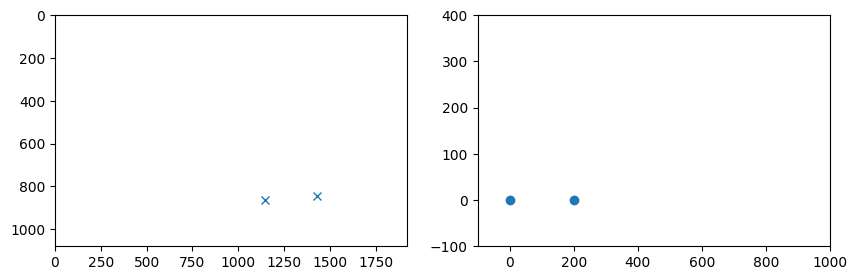

In [44]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,  figsize=(10, 3))
ax1.plot(points_old[0, :],points_old[1, :], 'x', label='old')
ax1.set_xlim([0, 1920])
ax1.set_ylim([0, 1080])
ax1.invert_yaxis()

ax2.set_xlim([-100, 1000])
ax2.set_ylim([-100, 400])

ax2.plot(points_new[0, :],points_new[1, :], 'o', label='new')
axes.legend()

plt.show()

**TESTING**

In [21]:
csv_frame = pd.read_csv("output/csv_pre_def/26.2_2021-11-13_191500_1.csv", delimiter=",")
xy_old = csv_frame[["x - Koordinate", "y - Koordinate"]].to_numpy(dtype=float)
xy_old_homogenous = np.vstack((xy_old.transpose(), np.ones(xy_old.shape[0])))

In [16]:
xy_old.transpose()

array([[1022., 1023., 1025., ...,  367.,  442.,  402.],
       [ 647.,  648.,  648., ...,  689.,  640.,  622.]])

In [18]:
np.ones(xy_old.shape[1]).reshape(1, -1)

array([[1., 1.]])

In [22]:
csv_frame.columns

Index(['Zeit', 'Framenummer', 'x - Koordinate', 'y - Koordinate', 'w - Breite',
       'h - Hoehe', 'Klassifikation', 'ID', 'Dateiname'],
      dtype='object')

In [13]:
# Points generator
def get_grid(x, y, homogenous=False):
    coords = np.indices((x, y)).reshape(2, -1)
    return np.vstack((coords, np.ones(coords.shape[1]))) if homogenous else coords

# Define Transformations
def get_rotation(angle):
    return np.array([
        [np.cos(angle), -np.sin(angle), 0],
        [np.sin(angle),  np.cos(angle), 0],
        [0, 0, 1]
    ])
def get_translation(tx, ty):
    return np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])

def get_scale(s):
    return np.array([
        [s, 0, 0],
        [0, s, 0],
        [0, 0, 1]
    ])

In [14]:
point1, point2 = np.array([1139, 869]), np.array([1426, 848])
delta = point2 - point1
rot_angle = math.atan(delta[1] / delta[0])
R1 = get_rotation(-rot_angle)

S1 = get_scale(np.hypot(delta[1], delta[0])/400)

T1 = get_translation(-point1[0], -point1[1])

R1, S1, T1

(array([[ 0.99733372, -0.07297564,  0.        ],
        [ 0.07297564,  0.99733372,  0.        ],
        [ 0.        ,  0.        ,  1.        ]]),
 array([[0.71941817, 0.        , 0.        ],
        [0.        , 0.71941817, 0.        ],
        [0.        , 0.        , 1.        ]]),
 array([[    1,     0, -1139],
        [    0,     1,  -869],
        [    0,     0,     1]]))

In [41]:
points_old = np.hstack((point1.reshape(2, -1), point2.reshape(2, -1)))

In [43]:
#points_new = R1 @ T1 @ S1 @ np.vstack((points_old, np.ones(points_old.shape[1])))
points_new = R1 @ S1 @ T1 @  np.vstack((points_old, np.ones(points_old.shape[1])))
points_new = np.array([
        [1, 0, 0],
        [0, -1, 0],
        [0, 0, 1]
    ]) @ points_new

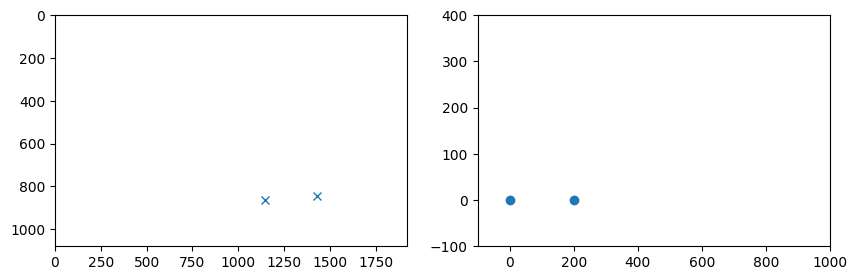

In [44]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,  figsize=(10, 3))
ax1.plot(points_old[0, :],points_old[1, :], 'x', label='old')
ax1.set_xlim([0, 1920])
ax1.set_ylim([0, 1080])
ax1.invert_yaxis()

ax2.set_xlim([-100, 1000])
ax2.set_ylim([-100, 400])

ax2.plot(points_new[0, :],points_new[1, :], 'o', label='new')
axes.legend()

plt.show()